<a href="https://colab.research.google.com/github/rwcitek/Data-Science-Foundations-Data-Mining-in-Python/blob/rwc-01/Ex_Files_Data_Mining_Python_R/Exercise%20Files/AirPassengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIR PASSENGERS DATASET

**File:** AirPassengers.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm


# LOAD AND PREPARE DATA

For all three demonstrations of time-series analysis, we'll use the well-known `AirPassengers` dataset, which saved in the data folder as `AirPassengers.csv`. This datset is a monthly time series, which gives the monthly totals of international airline passengers (in thousands) from 1949 to 1960.

## Data Source

Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) _Time Series Analysis, Forecasting and Control_. Third Edition. Holden-Day. Series G.


## Import Data

- Start by seeing the raw data.

In [2]:
# pd.read_csv('data/AirPassengers.csv')

In [3]:
# Load the dataset directly from R datasets
data = sm.datasets.get_rdataset("AirPassengers")

# The data is returned as an RDataset object; extract the pandas DataFrame
data.data


,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


## Prepare Data

- Import the data and parse the dates.

In [4]:
# df = pd.read_csv('data/AirPassengers.csv', parse_dates=['Month'], index_col=['Month'])

# df.head()

In [5]:
df = (
  data.data
  .set_index("time")
  .assign( Month = lambda x:
    pd.to_datetime(
      x.index.astype(int).astype(str) + '-' +
      ((x.index - x.index.astype(int)) * 12 + 1.1 ).astype(int).astype(str),
      format='%Y-%m',
    )
  )
  .set_index("Month")
)
df.head()


,value
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Describe Data

- Get basic descriptive statistics.

In [6]:
df.describe()

,value
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


## Plot Data

- Display the complete dataset.

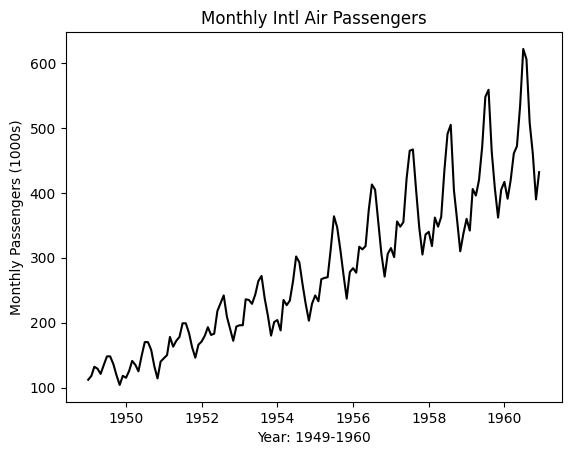

In [7]:
fig, ax = plt.subplots()
plt.xlabel('Year: 1949-1960')
plt.ylabel('Monthly Passengers (1000s)')
plt.title('Monthly Intl Air Passengers')
plt.plot(df, color='black')
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear.
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.